# Read Granules

In [1]:
import starepandas
import netCDF4
import matplotlib.pyplot as plt
import numpy
import pandas
import time
import copy
import geopandas
import pystare
import pyhdf

## Manually reading 

In [3]:
vnp03_name = '../tests/data/granules/viirs/VNP03DNB.A2022308.1930.002.2022309041547.nc'
vnp03 = starepandas.io.granules.VNP03DNB(vnp03_name)
vnp03.read_latlon()
vnp03.read_data()
vnp03 = vnp03.to_df(xy=True)

# VNP03

In [7]:
file_path = '../tests/data/granules/viirs/VNP09.A2022308.1930.001.2022309070407.hdf'
vnp09 = starepandas.io.granules.viirsl2.VNP09(file_path, nom_res='750m')
vnp09.read_data()
vnp09.read_timestamps()

In [10]:
vnp03_path = vnp09.guess_companion_path(prefix='VNP03MOD')
vnp03 = starepandas.io.granules.VNP03MOD(vnp03_path)
vnp03.read_data()
vnp03.read_sidecar_index()
vnp03.read_sidecar_latlon()

In [11]:
vnp09 = vnp09.to_df(xy=True)
vnp03 = vnp03.to_df()
vnp09 = vnp09.join(vnp03)
vnp09.dropna(inplace=True)

In [12]:
qf1 = starepandas.io.granules.viirsl2.decode_qf1(vnp09['QF1 Surface Reflectance'])
qf2 = starepandas.io.granules.viirsl2.decode_qf2(vnp09['QF2 Surface Reflectance'])
vnp09 = vnp09.join(qf1).join(qf2)

<AxesSubplot:xlabel='x', ylabel='sensor_zenith'>

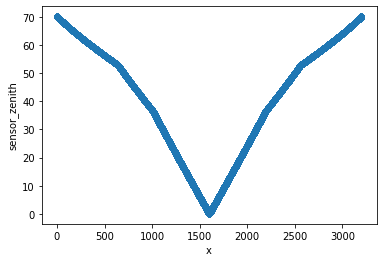

In [13]:
pandas.DataFrame(vnp09).plot(x='x', y='sensor_zenith', kind='scatter')

## MOD09GA

In [14]:
file_name = '../tests/data/granules/MOD09GA.A2020009.h00v08.006.2020011025435.hdf'

In [15]:
mod09ga = starepandas.read_granule(file_name, xy=True)
mod09ga

,x,y,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,QC_500m_1,obscov_500m_1
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5759995,2395,2399,0.2020,0.1939,0.2187,0.2053,0.1872,0.1359,0.0817,1073741824,0.15
5759996,2396,2399,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19
5759997,2397,2399,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19
5759998,2398,2399,0.2174,0.2094,0.2342,0.2225,0.2074,0.1464,0.0867,1073741824,0.11


In [16]:
mod09ga = starepandas.io.granules.Mod09GA(file_name)
mod09ga.read_data()

ds_name = 'state_1km_1'
mod09ga.read_dataset(ds_name, resample_factor=2)
mod09ga.decode_state('state_1km_1')
mod09ga.to_df()

,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,QC_500m_1,obscov_500m_1,state_1km_1,cloud,cloud_shadow,cloud_internal,snow_mod35,snow_internal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759995,0.2020,0.1939,0.2187,0.2053,0.1872,0.1359,0.0817,1073741824,0.15,1849,1,False,True,False,False
5759996,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19,1849,1,False,True,False,False
5759997,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19,1849,1,False,True,False,False
5759998,0.2174,0.2094,0.2342,0.2225,0.2074,0.1464,0.0867,1073741824,0.11,1849,1,False,True,False,False


In [17]:
sd = pyhdf.SD.SD(file_name)
ds = sd.select('sur_refl_b01_1')
ds.get() /  ds.attributes()['scale_factor']

array([[-2.8672, -2.8672, -2.8672, ..., -2.8672, -2.8672, -2.8672],
       [-2.8672, -2.8672, -2.8672, ..., -2.8672, -2.8672, -2.8672],
       [-2.8672, -2.8672, -2.8672, ..., -2.8672, -2.8672, -2.8672],
       ...,
       [-2.8672, -2.8672, -2.8672, ...,  0.2104,  0.2027,  0.2159],
       [-2.8672, -2.8672, -2.8672, ...,  0.2104,  0.2307,  0.2307],
       [-2.8672, -2.8672, -2.8672, ...,  0.2122,  0.2174,  0.2174]])

## MOD09

In [18]:
file_name = '../tests/data/granules/MOD09.A2002299.0710.006.2015151173939.hdf'
mod09 = starepandas.read_granule(file_name)

In [19]:
starepandas.io.granules.modis.decode_state(mod09['1km Reflectance Data State QA'])

,cloud,cloud_shadow,cloud_internal,snow_mod35,snow_internal
0,00,False,False,False,False
1,00,False,False,False,False
2,00,False,False,False,False
3,00,False,False,False,False
4,00,False,False,False,False
...,...,...,...,...,...
2748615,00,False,False,False,False
2748616,00,False,False,False,False
2748617,00,False,False,False,False
2748618,00,False,False,False,False


## MOD05

In [20]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod05 = starepandas.read_granule(fname, sidecar=True, latlon=True, xy=True, read_timestamp=True)
sids = mod05.to_array(mod05._sid_column_name)
#mod05.to_sidecar('test.nc')

In [21]:
mod05

,lat,lon,sids,ts_start,ts_end,x,y,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,53.201778,-15.933996,4298473764500464809,2019-12-02,2019-12-02 00:05:00,0,0,8.493984e+08,147.089997,-22.959999,65.339999,-89.519998,NaN
1,53.203171,-16.288101,4298458168380511209,2019-12-02,2019-12-02 00:05:00,1,0,8.493984e+08,146.999997,-23.539999,64.719999,-89.799998,NaN
2,53.203518,-16.629105,4297394569014717897,2019-12-02,2019-12-02 00:05:00,2,0,8.493984e+08,146.919997,-24.099999,64.109999,-90.079998,NaN
3,53.202934,-16.957928,4297300698872999369,2019-12-02,2019-12-02 00:05:00,3,0,8.493984e+08,146.839997,-24.639999,63.509999,-90.339998,NaN
4,53.201508,-17.275316,4297290857922121161,2019-12-02,2019-12-02 00:05:00,4,0,8.493984e+08,146.759997,-25.159999,62.909999,-90.589998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109615,64.084297,-66.281410,3727686638370615689,2019-12-02,2019-12-02 00:05:00,265,405,8.493987e+08,121.569997,-74.679998,62.229999,47.999999,NaN
109616,63.960953,-66.591354,3727661374545790857,2019-12-02,2019-12-02 00:05:00,266,405,8.493987e+08,121.469997,-75.049998,62.819999,47.719999,NaN
109617,63.831799,-66.911255,3727838256925064969,2019-12-02,2019-12-02 00:05:00,267,405,8.493987e+08,121.369997,-75.439998,63.419999,47.429999,NaN
109618,63.698635,-67.236229,3727843063731949801,2019-12-02,2019-12-02 00:05:00,268,405,8.493987e+08,121.259997,-75.829998,64.019999,47.139999,NaN


### Subset Loading

In [22]:
import shapely
roi = shapely.geometry.Polygon([[-120, 37],[-120, 38],[-119, 38],[-119, 37]])
roi = geopandas.GeoDataFrame(geometry=[roi], crs=4326)
roi = starepandas.STAREDataFrame(roi)
roi['sids'] = roi.make_sids(level=10)
sids = roi.sids.iloc[0]

<AxesSubplot:>

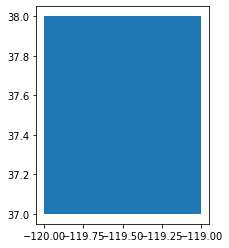

In [23]:
roi.plot(trixels=False)

In [24]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod = starepandas.io.granules.Mod05(fname)
mod.read_sidecar_index()

In [25]:
intersects = pystare.intersects(sids, mod.sids.flatten())
intersects = numpy.reshape(intersects, mod.sids.shape)
intersects

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## VNP02

In [27]:
vnp02_name = '../tests/data/granules/viirs/VNP02DNB.A2022308.1930.002.2022309051542.nc'
vnp02 = starepandas.read_granule(vnp02_name, sidecar=False, latlon=False)

In [28]:
vnp02 = vnp03.join(vnp02)

In [29]:
vnp02[(vnp02.land_water_mask==2) | (vnp02.land_water_mask==4) | (vnp02.land_water_mask==6) | (vnp02.land_water_mask==7)]

,lat,lon,sids,land_water_mask,quality_flag,sensor_azimuth,sensor_zenith,solar_azimuth,solar_zenith,DNB_observations,DNB_quality_flags
455,37.338570,-86.081223,3136251456291555374,2,0,-93.479996,57.369999,-145.660004,60.180000,0.001458,0
456,37.338127,-86.090012,3136251467726377678,2,0,-93.489998,57.340000,-145.669998,60.180000,0.001390,0
457,37.337685,-86.098862,3136255802309756046,2,0,-93.489998,57.320000,-145.679993,60.180000,0.001326,0
459,37.336792,-86.116508,3136256264895131726,2,0,-93.500000,57.270000,-145.699997,60.169998,0.001299,0
460,37.336346,-86.125351,3136256282433380782,2,0,-93.509995,57.239998,-145.709991,60.160000,0.001303,0
...,...,...,...,...,...,...,...,...,...,...,...
10342393,51.124065,-127.494835,3251396993398729101,2,0,57.029999,69.900002,170.179993,67.180000,0.005712,0
10342394,51.115986,-127.514580,3251397013913189901,2,0,57.009998,69.930000,170.160004,67.169998,0.005785,0
10342395,51.107269,-127.535835,3251396909009386956,2,0,57.000000,69.970001,170.129990,67.169998,0.005669,0
10342396,51.099239,-127.555397,3249540796346179405,2,0,56.980000,70.000000,170.110001,67.159996,0.005726,0


## VNP CLDMSK

In [30]:
cldmsk_name = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'

In [31]:
cldmsk = starepandas.io.granules.CLDMSKL2VIIRS(cldmsk_name)

In [32]:
cldmsk.read_latlon()
cldmsk.read_data()
cldmsk.to_df()

,lat,lon,Integer_Cloud_Mask
0,41.747662,-104.969498,3
1,41.747696,-104.950218,3
2,41.747730,-104.930237,3
3,41.747761,-104.910843,3
4,41.747784,-104.891747,3
...,...,...,...
10342395,16.522247,-78.595093,2
10342396,16.518646,-78.580162,1
10342397,16.515034,-78.565208,0
10342398,16.511414,-78.550224,1


## Plotting

In [35]:
path = '../tests/data/granules/viirs/VNP03DNB.A2022308.1930.002.2022309041547.nc'
vnp03dnb = starepandas.io.granules.VNP03DNB(path)
vnp03dnb.read_latlon()

path = '../tests/data/granules/viirs/VNP03MOD.A2022308.1930.002.2022309041547.nc'
vnp03mod = starepandas.io.granules.VNP03MOD(path)
vnp03mod.read_latlon()

path = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'
cldmsk = starepandas.io.granules.CLDMSKL2VIIRS(path)
cldmsk.read_latlon()

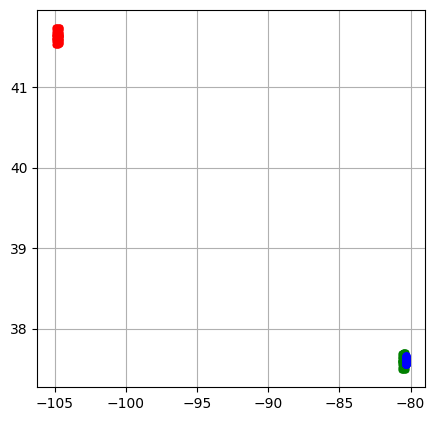

In [36]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

n = 20
ns = 0
nt = 0

ax.grid('on')

ax.plot(cldmsk.lon[ns:ns+n, nt:nt+n].flatten(), cldmsk.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='r', lw=0, marker='.')

ax.plot(vnp03mod.lon[ns:ns+n, nt:nt+n].flatten(), vnp03mod.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='g',lw=0, marker='.')

ax.plot(vnp03dnb.lon[ns:ns+n, nt:nt+n].flatten(), vnp03dnb.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='b',lw=0, marker='.')